In [3]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import *

INPUT_PATH = "../data/processed/"
VERSION = "v1"

In [4]:
spark = SparkSession.builder.appName("ds-classify").getOrCreate()
dataset = spark.read.parquet(f"{INPUT_PATH}/dataset_{VERSION}")

In [5]:
dataset.show()

+------+---+-------------+--------------------+-----+------------------+---+-----------+-------------+----------------------+----------+----------------------+---------------+-----+-------------+------+-------+----------+----+---+---+
|    id| uf|  sentido_via|       tipo_acidente|   km|    causa_acidente| br|   fase_dia|estado_fisico|condicao_metereologica|tipo_pista|ano_fabricacao_veiculo|   tipo_veiculo|idade|         sexo|mortos|feriado|      date| ano|mes|dia|
+------+---+-------------+--------------------+-----+------------------+---+-----------+-------------+----------------------+----------+----------------------+---------------+-----+-------------+------+-------+----------+----+---+---+
|260497| SC|    Crescente|    Colisão traseira| 36,8|Ingestão de Álcool|101|Plena Noite|Não Informado|               Nublado|     Dupla|                    NA|       Caminhão|   NA|Não Informado|     0|   NULL|2020-01-03|2020|  1|  3|
|260687| SP|  Decrescente|     Colisão frontal|   46|Ingestã

In [6]:
dataset = dataset.filter(col('causa_acidente').isin(['Ingestão de Álcool', 'Ingestão de álcool pelo condutor'])) 

In [7]:
dataset.createOrReplaceTempView("Acidentes")

## Os principais tipos de acidentes por Estado
Como podemos ver as principais colisões acontecem MG, SC e no PR, juntos eles corresponde a 35% dos acidentes. Porém analisamos as a quantidade de mortes, notasse que MG continua liderando junto com PR e que BA salta da 7ª posição e os estados que mais acontece mortes.

24/02/23 18:51:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:51:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:51:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:51:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:51:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:51:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Axes: xlabel='UF'>

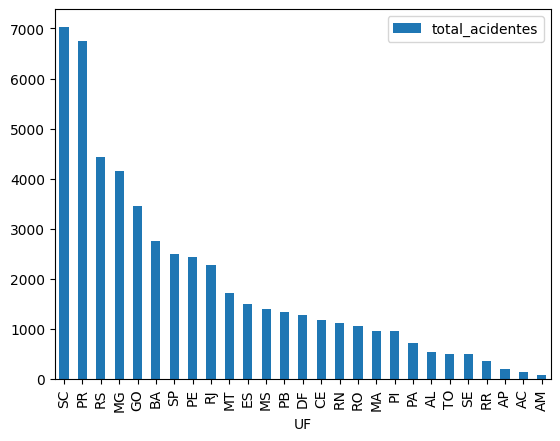

In [8]:
df_pandas = spark.sql(
    """
    SELECT UF, 
        COUNT(*) as total_acidentes,
        ROUND((COUNT(*) / SUM(COUNT(*)) OVER ()) * 100, 2) as porcentagem
    FROM acidentes
    GROUP BY UF
    ORDER BY total_acidentes DESC
    """
).toPandas()

df_pandas.plot(x='UF', y='total_acidentes', kind='bar')


Porém

24/02/23 18:52:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:52:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:52:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:52:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:52:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:52:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Axes: xlabel='UF'>

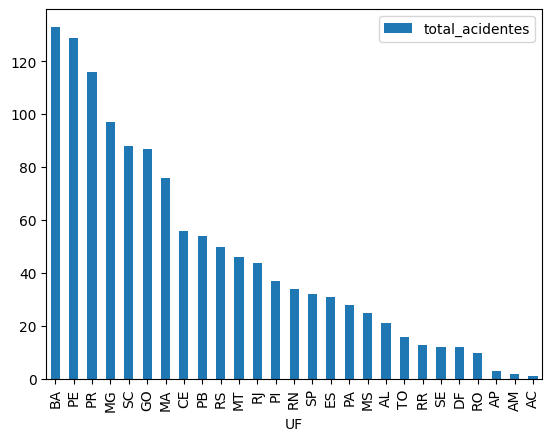

In [9]:
df_pandas = spark.sql(
    """
    SELECT UF, 
        COUNT(*) as total_acidentes,
        ROUND((COUNT(*) / SUM(COUNT(*)) OVER ()) * 100, 2) as porcentagem
    FROM acidentes
    WHERE mortos <> 0
    GROUP BY UF
    ORDER BY total_acidentes DESC
    """
).toPandas()
df_pandas.plot(x='UF', y='total_acidentes', kind='bar')


24/02/23 18:53:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:53:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:53:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:53:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:53:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/02/23 18:53:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


<Axes: xlabel='fase_dia'>

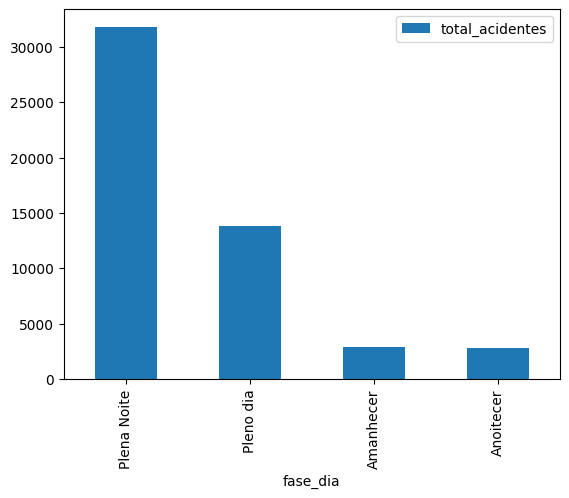

In [10]:
df_pandas = spark.sql(
    """
SELECT fase_dia, 
       COUNT(*) as total_acidentes,
       ROUND((COUNT(*) / SUM(COUNT(*)) OVER ()) * 100, 2) as porcentagem
FROM acidentes
GROUP BY fase_dia
ORDER BY total_acidentes DESC

    """
).toPandas()

df_pandas.plot(x='fase_dia', y='total_acidentes', kind='bar')


<Axes: xlabel='condicao_metereologica'>

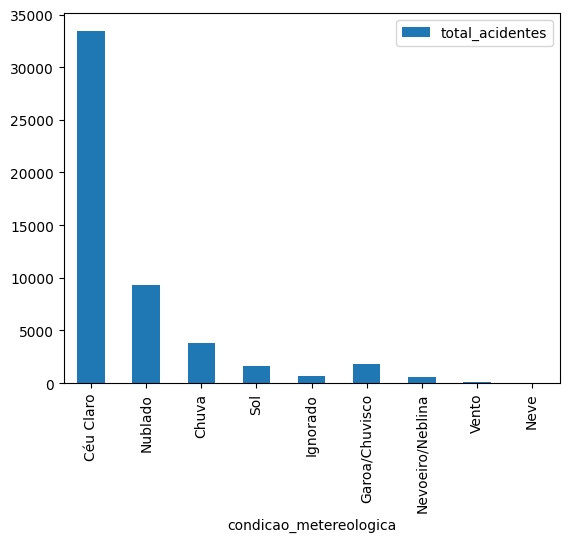

In [11]:
df_pandas = spark.sql(
    """
SELECT condicao_metereologica, 
       COUNT(*) as total_acidentes, 
       SUM(CASE WHEN mortos <> 0 THEN 1 ELSE 0 END) as total_obitos
FROM acidentes
GROUP BY condicao_metereologica
ORDER BY total_obitos DESC
    """
).toPandas()

df_pandas.plot(x='condicao_metereologica', y='total_acidentes', kind='bar')
